In [1]:
import os

In [2]:
pip install polars

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import polars as pl
import polars.selectors as cs
import seaborn as sbn
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

print(pl.__version__)

1.17.1


In [5]:
df = pl.read_csv('sms-log-AC36f8c891aaad24e1532861402eff88ba_2024-12-16.csv')

In [6]:
own_number = "+18509193315"

In [7]:
#Difference in reponses between bots and users

In [8]:
botdf = df.filter(df["From"] == own_number)
botdf.head(3)

From,To,Body,Status,SentDate,ApiVersion,NumSegments,ErrorCode,AccountSid,Sid,Direction,Price,PriceUnit,ShortenedLinkEnabled,ShortenedLinkFirstClicked
str,str,str,str,str,str,i64,i64,str,str,str,f64,str,bool,str
"""+18509193315""","""+19148826021""","""Now let's get to know you. Ar…","""delivered""","""2024-12-05T19:32:03-05:00""","""2010-04-01""",1,0,"""AC36f8c891aaad24e1532861402eff…","""SMbbf8e26c1c28191fefd5647542a0…","""outbound-api""",-0.0079,"""USD""",false,null
"""+18509193315""","""+19148826021""","""And, what's your email ?""","""delivered""","""2024-12-05T19:31:46-05:00""","""2010-04-01""",1,0,"""AC36f8c891aaad24e1532861402eff…","""SMd119b92e4c4f86211c8c76d36829…","""outbound-api""",-0.0079,"""USD""",false,null
"""+18509193315""","""+19148826021""","""Hi! My name is Helius🙂, and I'…","""delivered""","""2024-12-05T19:31:20-05:00""","""2010-04-01""",3,0,"""AC36f8c891aaad24e1532861402eff…","""SMa33bb9795a1b138e7a159bcecc9b…","""outbound-api""",-0.0237,"""USD""",false,null


In [9]:
userdf = df.filter(df["From"] != own_number)
userdf.head(3)

From,To,Body,Status,SentDate,ApiVersion,NumSegments,ErrorCode,AccountSid,Sid,Direction,Price,PriceUnit,ShortenedLinkEnabled,ShortenedLinkFirstClicked
str,str,str,str,str,str,i64,i64,str,str,str,f64,str,bool,str
"""+19148826021""","""+18509193315""","""Sumunna@gmail.com""","""received""","""2024-12-05T19:32:02-05:00""","""2010-04-01""",1,0,"""AC36f8c891aaad24e1532861402eff…","""SMa8478f983a17d58d0e0b35297b7b…","""inbound""",-0.0079,"""USD""",false,null
"""+19148826021""","""+18509193315""","""Stella Umunna""","""received""","""2024-12-05T19:31:38-05:00""","""2010-04-01""",1,0,"""AC36f8c891aaad24e1532861402eff…","""SM98546fbfc44ae368bf9dc847f7ef…","""inbound""",-0.0079,"""USD""",false,null
"""+17708234492""","""+18509193315""","""3""","""received""","""2024-08-09T09:54:43-04:00""","""2010-04-01""",1,0,"""AC36f8c891aaad24e1532861402eff…","""SMb197f083f6d00144b8d882f3bd9a…","""inbound""",-0.0079,"""USD""",false,null


In [10]:
botm = botdf["Body"].to_list()
botlengths = []

for message in botm:
    botlengths.append(len(message))

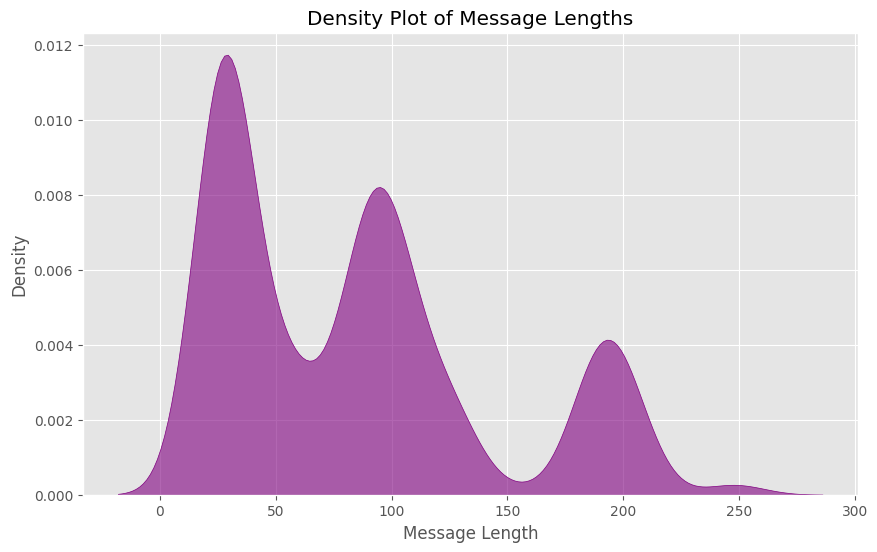

In [11]:
plt.figure(figsize=(10, 6))
sbn.kdeplot(botlengths, fill=True, color='purple', alpha=0.6)
plt.title('Density Plot of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Density')
plt.show()

In [12]:
bot_avg_len = sum(botlengths)/len(botlengths)
print(bot_avg_len)

84.34674063800277


In [13]:
userm = userdf["Body"].to_list()
userlengths = []

for message in userm:
    userlengths.append(len(message))

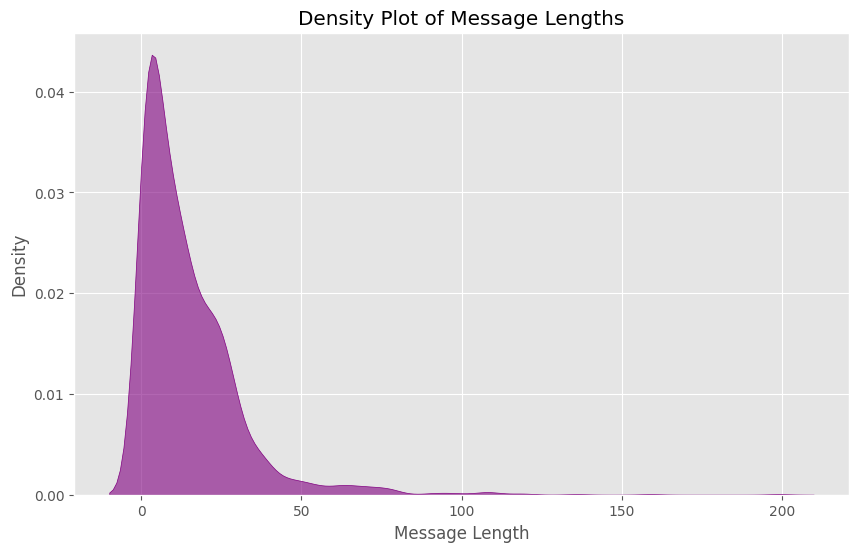

In [14]:
plt.figure(figsize=(10, 6))
sbn.kdeplot(userlengths, fill=True, color='purple', alpha=0.6)
plt.title('Density Plot of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Density')
plt.show()

In [15]:
user_avg_len = sum(userlengths)/len(userlengths)
print(user_avg_len)

14.54621409921671


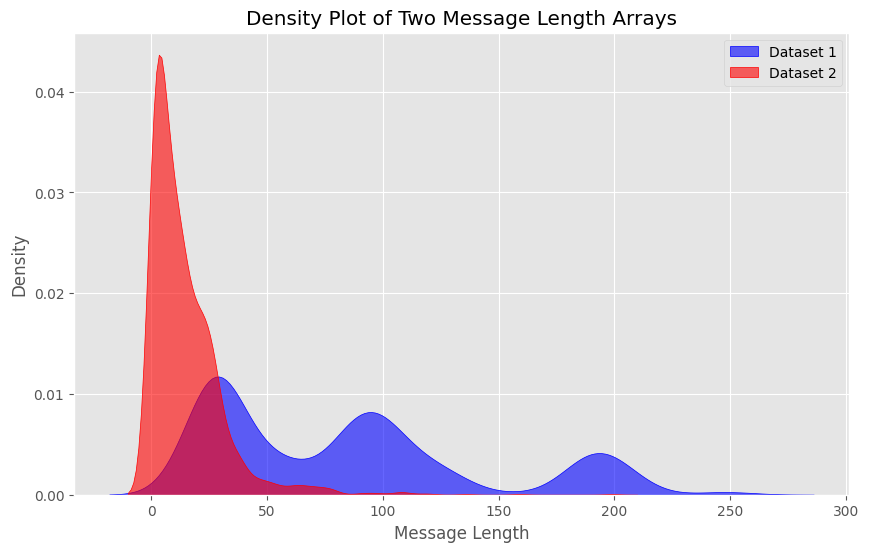

In [16]:
plt.figure(figsize=(10, 6))
sbn.kdeplot(botlengths, fill=True, color='blue', label='Dataset 1', alpha=0.6)
sbn.kdeplot(userlengths, fill=True, color='red', label='Dataset 2', alpha=0.6)

# Adding titles and labels
plt.title('Density Plot of Two Message Length Arrays')
plt.xlabel('Message Length')
plt.ylabel('Density')

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [17]:
#differences between mean:
print("Average lenght of bot repsonses", bot_avg_len)
print("Average lenght of user repsonses", user_avg_len)
print("Bot's reponses are", bot_avg_len/user_avg_len, "times more than user's")

Average lenght of bot repsonses 84.34674063800277
Average lenght of user repsonses 14.54621409921671
Bot's reponses are 5.798535623268786 times more than user's


In [47]:
timedf = userdf["SentDate"]
timedf1 = userdf.with_columns(pl.col("SentDate"))
timedf.head(3)
timedf = timedf.str.extract(r"T(\d{2}:)", 1).alias("Time")
timedf1 = timedf1.with_columns(pl.col("SentDate").str.extract(r"T(\d{2}:)", 1).alias("Hour"))
timedf.head(3)
print(type(timedf))
print(type(timedf1))


<class 'polars.series.series.Series'>
<class 'polars.dataframe.frame.DataFrame'>


In [56]:
hour_counts = timedf1.group_by("Hour").count().sort("Hour")
print(hour_counts)
print(type(hour_counts))
hour = hour_counts["Hour"].to_numpy()
count = hour_counts["count"].to_numpy()
print(hour)
print(count)

shape: (18, 2)
┌──────┬───────┐
│ Hour ┆ count │
│ ---  ┆ ---   │
│ str  ┆ u32   │
╞══════╪═══════╡
│ 00:  ┆ 1     │
│ 07:  ┆ 5     │
│ 08:  ┆ 29    │
│ 09:  ┆ 25    │
│ 10:  ┆ 77    │
│ …    ┆ …     │
│ 19:  ┆ 2     │
│ 20:  ┆ 9     │
│ 21:  ┆ 21    │
│ 22:  ┆ 9     │
│ 23:  ┆ 12    │
└──────┴───────┘
<class 'polars.dataframe.frame.DataFrame'>
['00:' '07:' '08:' '09:' '10:' '11:' '12:' '13:' '14:' '15:' '16:' '17:'
 '18:' '19:' '20:' '21:' '22:' '23:']
[  1   5  29  25  77 229 284 211 586 287  95  21  12   2   9  21   9  12]


/var/folders/18/k8j6sbms4cg4_p1jf88pc2y40000gn/T/ipykernel_2627/2121312107.py:1: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  hour_counts = timedf1.group_by("Hour").count().sort("Hour")


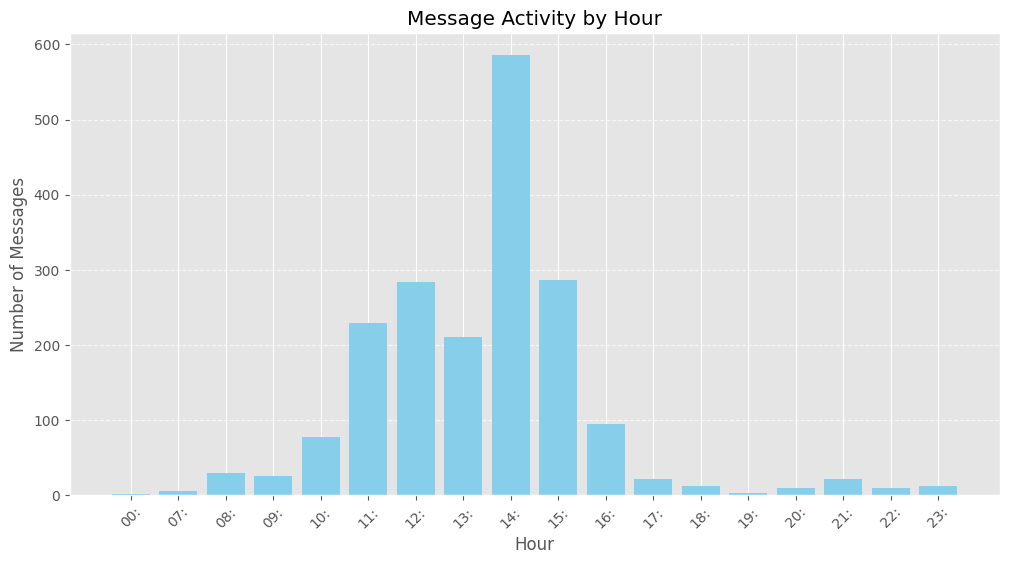

In [57]:
plt.figure(figsize=(12, 6))
plt.bar(hour, count, color="skyblue")
plt.xticks(rotation=45)
plt.title("Message Activity by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Messages")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
total_messages = sum(count)
percentages = [(count / total_messages) * 100 for count in count]
most_active_hour = hour[percentages.index(max(percentages))]
print(f"Most Active Hour: {most_active_hour} with {max(percentages):.2f}% of messages")

Most Active Hour: 14: with 30.60% of messages
[np.float64(0.05221932114882506), np.float64(0.26109660574412535), np.float64(1.514360313315927), np.float64(1.3054830287206265), np.float64(4.02088772845953), np.float64(11.95822454308094), np.float64(14.830287206266318), np.float64(11.018276762402088), np.float64(30.60052219321149), np.float64(14.986945169712792), np.float64(4.960835509138381), np.float64(1.0966057441253265), np.float64(0.6266318537859008), np.float64(0.10443864229765012), np.float64(0.4699738903394256), np.float64(1.0966057441253265), np.float64(0.4699738903394256), np.float64(0.6266318537859008)]


In [20]:
unique_numbers = df.filter(df["To"] != own_number)["To"].unique()
print (unique_numbers)

shape: (197,)
Series: 'To' [str]
[
	"+12035845560"
	"+12038191648"
	"+17815881266"
	"+18609770201"
	"+14133889412"
	…
	"+12038871287"
	"+18608849244"
	"+12035729327"
	"+18606390785"
	"+12039962085"
]


In [21]:
dataframes = {}
for number in unique_numbers:
    dataframes[number] = df.filter((df["From"] == number) | (df["To"] == number))

In [22]:
output_file = "all_sms_logs.csv"
if os.path.exists(output_file):
    os.remove(output_file)

In [23]:
for number, sub_df in dataframes.items():
    #output_path = f"sms_logs_{number}.csv"
    #sub_df.write_csv(output_path)
    #print(f"Data for {number} saved to {output_path}")
    sub_df = sub_df.with_columns(pl.lit(number).alias("Number"))
    sub_df.write_csv(output_file, mode="a", has_header=not os.path.exists(output_file))
    print(f"Appended data for {number} to {output_file}")

TypeError: DataFrame.write_csv() got an unexpected keyword argument 'mode'

In [ ]:
with open(output_file, mode="w") as f:  # "w" mode to start fresh
    for i, (number, sub_df) in enumerate(dataframes.items()):
        # Add a column to identify the number
        sub_df = sub_df.with_columns(pl.lit(number).alias("Number"))

        # Write the DataFrame to the file
        if i == 0:
            # Include header for the first DataFrame
            sub_df.write_csv(f)
        else:
            # Skip header for subsequent DataFrames
            sub_df.write_csv(f, include_header=False)

print(f"All data has been written to {output_file}")

thread 'polars-0' panicked at crates/polars-io/src/csv/write/write_impl/serializer.rs:659:41:
too many items requested from CSV serializer


PanicException: too many items requested from CSV serializer